In [456]:
import pandas as pd
import matplotlib.pyplot as plt

In [458]:
windspeed= pd.read_csv("15 - Wind-Speed.csv")

In [460]:
windspeed

,YEAR,MO,DY,HR,WS10M
0,2020,12,31,19,2.61
1,2020,12,31,20,2.77
2,2020,12,31,21,2.86
3,2020,12,31,22,2.87
4,2020,12,31,23,2.92
...,...,...,...,...,...
8755,2021,12,31,14,2.73
8756,2021,12,31,15,2.65
8757,2021,12,31,16,2.32
8758,2021,12,31,17,2.21


In [462]:
#windspeed.info()

In [464]:
#windspeed.count()

In [466]:
ws= windspeed.iloc[ :,4:5]

In [468]:
ws

,WS10M
0,2.61
1,2.77
2,2.86
3,2.87
4,2.92
...,...
8755,2.73
8756,2.65
8757,2.32
8758,2.21


In [470]:
#if we want to convert Km/hr to m/sec
#def meter_second(x):
 #   return (x/3.16)

In [472]:
#### Given Data:
#Rated Power= 25kw, cutin speed=2.5m/s, cutout speed=20m/s
#Blade Length=7.6m, S_area=181m2, Hub_height= 16m
# Air Density kg/m3
Area=181 #m2
AD= 1.275
Bz=0.593
#Efficiency of generator
Eff=0.8


In [474]:
def wind_p(x):
    return(0.5*AD*(x**3)*Bz*Eff*Area)/1000 #to convert it in KW divide by 1000

In [476]:
wind_power= wind_p(ws)

In [478]:
wind_power

,WS10M
0,0.973251
1,1.163437
2,1.280565
3,1.294044
4,1.362862
...,...
8755,1.113759
8756,1.018688
8757,0.683545
8758,0.590854


In [480]:
wind_power.rename(columns = {'WS10M':'Power_Output (kW)'}, inplace=True)
wind_power

,Power_Output (kW)
0,0.973251
1,1.163437
2,1.280565
3,1.294044
4,1.362862
...,...
8755,1.113759
8756,1.018688
8757,0.683545
8758,0.590854


In [482]:
# to find out the power at cutin speed:
p_at_cutin=(wind_p(2.5)) 
p_at_cutin

0.8553098437500001

In [484]:
# to find out the power at cutout speed:
p_at_cutout=(wind_p(20))
p_at_cutout

437.91864000000004

In [486]:
# to incorporate the cutinspeed and cutoutspeed in our geneartion power
wind_power.loc[(wind_power['Power_Output (kW)'] >=25) & (wind_power['Power_Output (kW)']<p_at_cutout)]=25
wind_power.loc[wind_power['Power_Output (kW)'] >= p_at_cutout] = 0
wind_power.loc[wind_power['Power_Output (kW)'] <= p_at_cutin] = 0


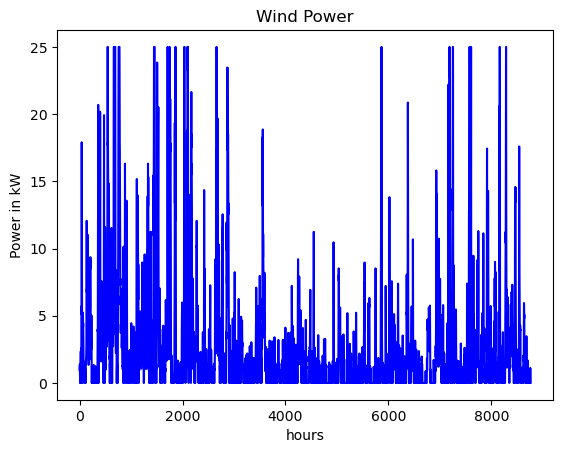

In [488]:
#For Visualisation
plt.plot(wind_power, c='b')
plt.xlabel('hours')
plt.ylabel('Power in kW')
plt.title('Wind Power')
plt.show()

In [490]:
DF = pd.concat([wind_power,ws],axis=1)#merge two column together
DF.sort_values(by=['WS10M'],ascending=True,ignore_index=True,inplace=True)
DF

,Power_Output (kW),WS10M
0,0.0,0.15
1,0.0,0.15
2,0.0,0.17
3,0.0,0.17
4,0.0,0.19
...,...,...
8755,25.0,10.20
8756,25.0,10.22
8757,25.0,10.31
8758,25.0,10.32


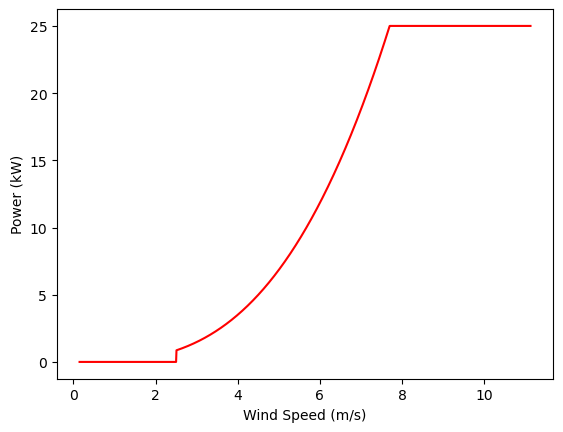

In [492]:
plt.plot(DF['WS10M'],DF['Power_Output (kW)'],c = 'r')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.show()